In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier


In [6]:
iris = load_iris()
iris

In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Hacemos un marco de datos

In [12]:
marco_datos = pd.DataFrame(iris.data, columns=iris.feature_names)
marco_datos

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


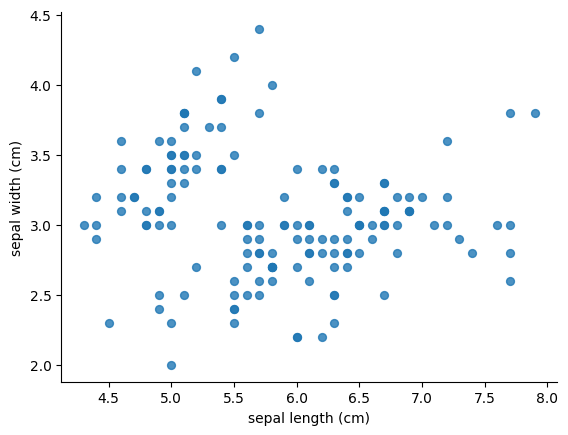

In [13]:
# @title sepal length (cm) vs sepal width (cm)

from matplotlib import pyplot as plt
marco_datos.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
# Agregamos columna target

marco_datos['target'] = iris.target

In [15]:
marco_datos

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
marco_datos['tipo_flor'] = marco_datos['target'].apply(lambda x: iris.target_names[x])

In [44]:
marco_datos[20:70]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,tipo_flor
20,5.4,3.4,1.7,0.2,0,setosa
21,5.1,3.7,1.5,0.4,0,setosa
22,4.6,3.6,1.0,0.2,0,setosa
23,5.1,3.3,1.7,0.5,0,setosa
24,4.8,3.4,1.9,0.2,0,setosa
25,5.0,3.0,1.6,0.2,0,setosa
26,5.0,3.4,1.6,0.4,0,setosa
27,5.2,3.5,1.5,0.2,0,setosa
28,5.2,3.4,1.4,0.2,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa


In [45]:
setosa = marco_datos[:50]
versicolor = marco_datos[50:100]
virginica = marco_datos[100:]

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

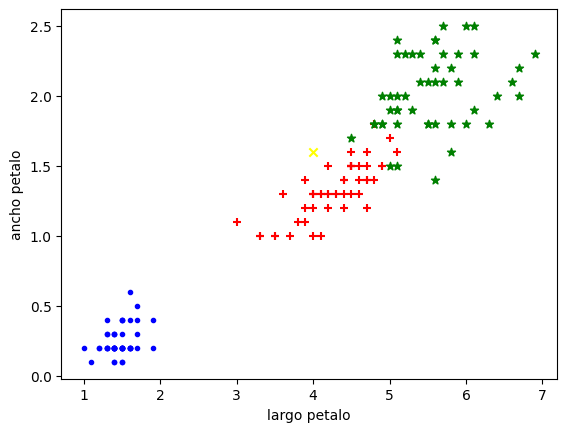

In [60]:
plt.xlabel('largo petalo')
plt.ylabel('ancho petalo')
plt.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], color='blue', marker='.')
plt.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], color='red', marker='+')
plt.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], color='green', marker='*')

plt.scatter(4,1.6, color='yellow', marker='x')


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x = marco_datos.drop(['target', 'tipo_flor'], axis='columns')
y = marco_datos.target

print(x, y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns] 0      0
1      0
2      0
3      0
4   

In [50]:
x_entrenamiento, x_verificacion, y_entrenamiento, y_verificacion = train_test_split(x, y, test_size=0.2, random_state=1)

In [51]:
kvc = KNeighborsClassifier(n_neighbors=18)

In [52]:
kvc.fit(x_entrenamiento, y_entrenamiento)

KNeighborsClassifier(n_neighbors=18)

In [53]:
kvc.score(x_verificacion, y_verificacion)

0.9666666666666667

In [61]:
prediccion = kvc.predict([[4, 1.6, 4.1, 1.5]])

if prediccion[0] == 0:
  print("predijo setosa")
else:
  if prediccion[0] == 1:
    print("predijo versicolor")


predijo versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
